# 1. Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# 2. Loading dataset and defining problem

In [2]:
datafile = pd.read_csv('CarPrice_main_dataset.csv')
datafile.head()

,S.No#,CarTitle,CarCompany,ModelYear,Mileage(km),EngineType,Transmission,RegisteredCIty,CarColor,EngineCapacity(cc),BodyType,Price(PKR_lacs)
0,1,Suzuki Bolan VX 2010,Suzuki,2010,60000,Petrol,Manual,Lahore,Maroon,800,Mini Van,6.45
1,2,Suzuki Alto VXR 2006,Suzuki,2006,54000,Petrol,Manual,Islamabad,White,1000,Hatchback,6.45
2,3,Suzuki Cultus VXR 2006,Suzuki,2006,50000,Petrol,Manual,Lahore,Silver,1000,Hatchback,6.45
3,4,Suzuki Mehran VX (CNG) 2012,Suzuki,2012,59000,Petrol,Manual,Lahore,Black,800,Hatchback,6.45
4,5,Suzuki Mehran VX 2011,Suzuki,2011,45000,Petrol,Manual,Sindh,White,800,Hatchback,6.50


In [3]:
Continuous_features =[ 'ModelYear', 'Mileage(km)','EngineCapacity(cc)',  'Price(PKR_lacs)']
Categorical_features = ['CarCompany','EngineType', 'Transmission', 'RegisteredCIty', 'CarColor', 'BodyType']


# 5 Features selection
1. Deleting the features which are logically useless.


2. Visual exploration and  Statistical measurement for the  relationship between continuous features and target Price(PKR_lacs)

    a. Continuous feature vs Continuous target Price(PKR_lacs)(PKR_lacs)(PKR_lacs)(PKR_lacs) -----Scatter plot
    
    b. Continuous feature vs Continuous target Price(PKR_lacs) -----Correlation Matrix    

    
3. Visual exploration and  Statistical measurement for relationship between Categorical features and target Price(PKR_lacs)
    
    b. Categorical feature vs Continuous target Price(PKR_lacs) ----Box plot
    
    b. Categorical feature vs Continuous target Price(PKR_lacs)------- Correlation test

##  5.1 Deleting the features which are logically useless.

In [4]:
datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11713 entries, 0 to 11712
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   S.No#               11713 non-null  int64  
 1   CarTitle            11713 non-null  object 
 2   CarCompany          11713 non-null  object 
 3   ModelYear           11713 non-null  int64  
 4   Mileage(km)         11713 non-null  int64  
 5   EngineType          11713 non-null  object 
 6   Transmission        11713 non-null  object 
 7   RegisteredCIty      11713 non-null  object 
 8   CarColor            11713 non-null  object 
 9   EngineCapacity(cc)  11713 non-null  int64  
 10  BodyType            11713 non-null  object 
 11  Price(PKR_lacs)     11713 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 1.1+ MB


We will drop 'S.No#' column. Also we need to drop 'CarTitle' column as we have already derived a new variable i.e. 'CarCompany' from them. 

## 5.2 Exploration of relationship between Continuous feature vs Continuous target (scatter plot and correlation )

### 6.2.a1 Visual exploration of relationship between Continuous feature vs Continuous featrurr --- Scatter plot

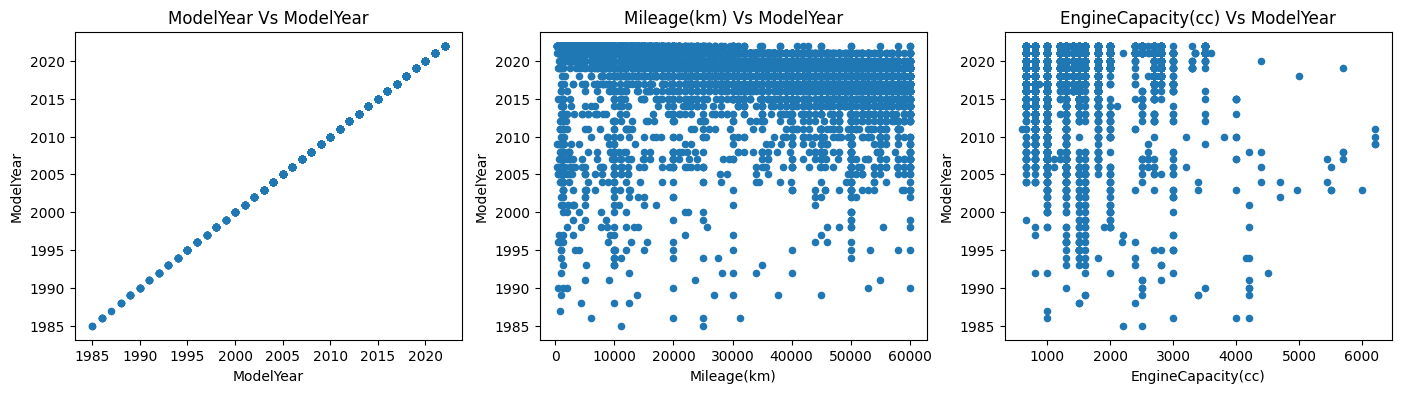

In [5]:
Continuous_features =['ModelYear', 'Mileage(km)','EngineCapacity(cc)']#,  'Price(PKR_lacs)']
fig, axes = plt.subplots(nrows = 1, ncols = len(Continuous_features), figsize = (17,4))
for feature, i in zip (Continuous_features, range(len(Continuous_features))):
    datafile.plot.scatter(x = feature, y = 'ModelYear', title = feature + ' Vs ' + 'ModelYear', ax = axes[i])


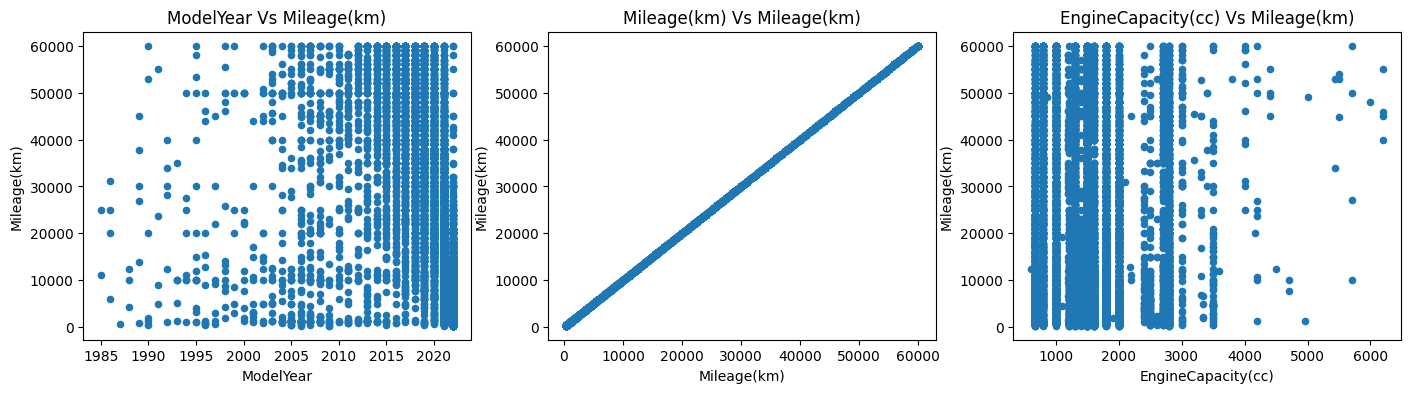

In [6]:
Continuous_features =['ModelYear', 'Mileage(km)','EngineCapacity(cc)']#,  'Price(PKR_lacs)']
fig, axes = plt.subplots(nrows = 1, ncols = len(Continuous_features), figsize = (17,4))
for feature, i in zip (Continuous_features, range(len(Continuous_features))):
    datafile.plot.scatter(x = feature, y = 'Mileage(km)', title = feature + ' Vs ' + 'Mileage(km)', ax = axes[i])

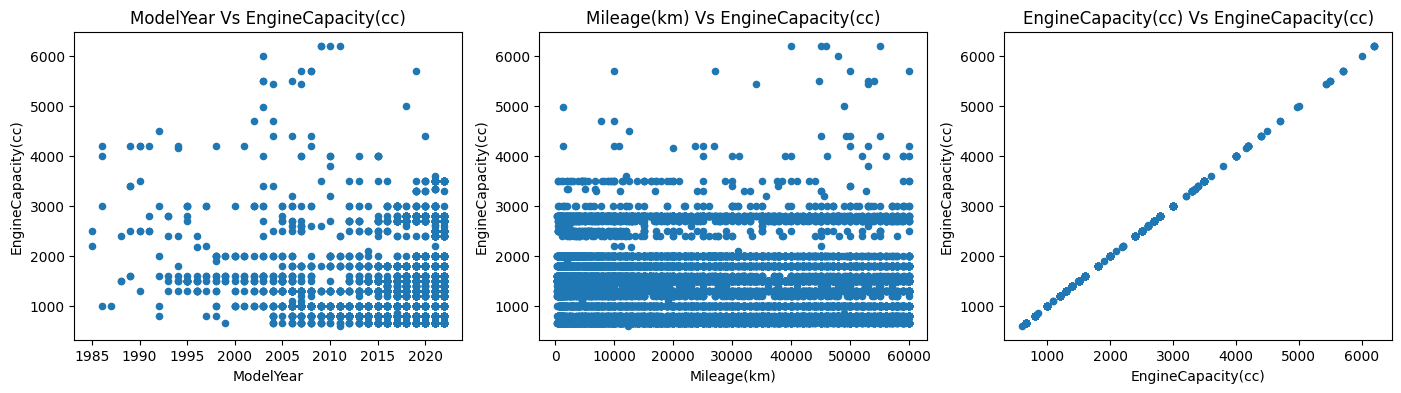

In [7]:
Continuous_features =['ModelYear', 'Mileage(km)','EngineCapacity(cc)']#,  'Price(PKR_lacs)']
fig, axes = plt.subplots(nrows = 1, ncols = len(Continuous_features), figsize = (17,4))
for feature, i in zip (Continuous_features, range(len(Continuous_features))):
    datafile.plot.scatter(x = feature, y = 'EngineCapacity(cc)', title = feature + ' Vs ' + 'EngineCapacity(cc)', ax = axes[i])

### 6.2.a2 Visual exploration of relationship between Continuous feature vs Continuous target --- Scatter plot

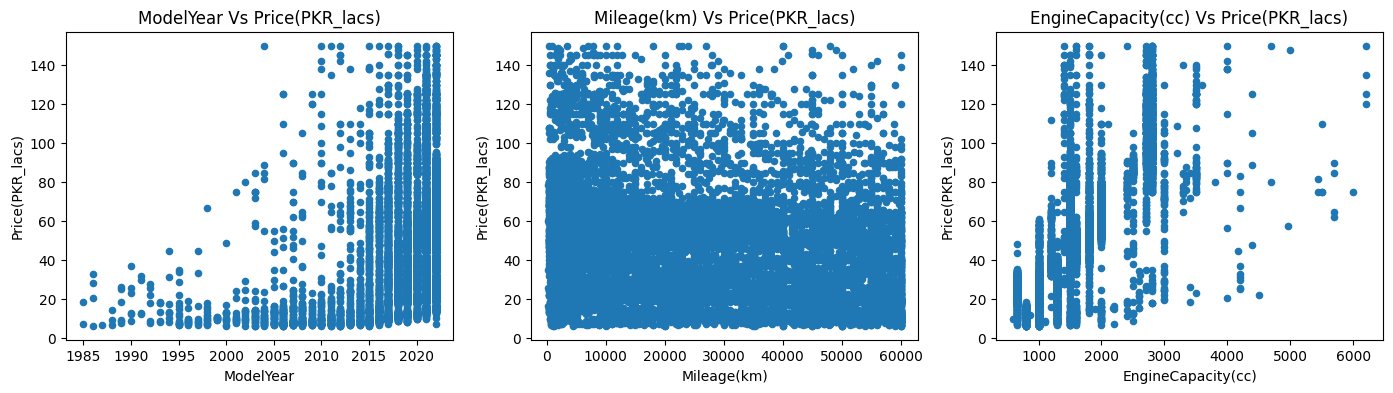

In [8]:
Continuous_features =[ 'ModelYear', 'Mileage(km)','EngineCapacity(cc)']#,  'Price(PKR_lacs)']
fig, axes = plt.subplots(nrows = 1, ncols = len(Continuous_features), figsize = (17,4))
for feature, i in zip (Continuous_features, range(len(Continuous_features))):
    datafile.plot.scatter(x = feature, y = 'Price(PKR_lacs)', title = feature + ' Vs ' + 'Price(PKR_lacs)', ax = axes[i])

The scatter plots give an idea about how the two variables are correlated. 

1. Increasing Trend: This means both variables are positively correlated. In other words, they are directly proportional to  each other, an increase in one variable causes an increase in other variable. This is good for ML!

2. Decreasing Trend: This means both variables are negatively correlated. In other words, they are inversely proportional to each other, an increase in one variable causes a decrease in other variable. This is also good for ML!

3. No Trend: We cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence the predictor cannot be used for ML.

Here,

2. Increasing Trend: We can observe an increasing trend between Price and _______ of car. 

1. Decreasing Trend: We can observe a decreasing trend between Price and _______ of car.

We will confirm this with Peaeson's Correlation Coefficient.

### 6.2.b Statistical measurement of relationship between Continuous feature vs Continuous target --- Pearson's correlation coefficient

1. Correlation between (-1,0) means variables are inversely proportional, the scatter plot will show a downward trend.

2. Correlation between (0,1) means variables are directly proportional, the scatter plot will show a upward trend.

3. Correlation near (0) means no relationship between variables, the scatter plot will not show clear trend.

4. If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship and the sign does not matter.

##### Calculating Pearson's correlation coefficient for all the continuous features and selecting those whose coefficient is greater than 0.5

In [9]:

Correlation_variables = [ 'ModelYear', 'Mileage(km)','EngineCapacity(cc)',  'Price(PKR_lacs)']
Correlation = datafile[Correlation_variables].corr()
print(Correlation)

Continuous_features = [ 'ModelYear', 'Mileage(km)','EngineCapacity(cc)',  'Price(PKR_lacs)']

# Creating an empty list of selected features after ANOVA test
Selected_features_Pearson_Correlation = []
    
# printing correlation between target and features only.
print('-------------------------------------------------------------')
print ('\n------ Pearson correlation coefficient Results ------ \n')
for feature in Continuous_features:
    print(feature)
    Correlation_Result = datafile['Price(PKR_lacs)'].corr(datafile[feature])
    print('Pearsons correlation between Price(PKR_lacs) and', feature, ':', Correlation_Result)  
    print('Pearsons correlation absolute value between Price(PKR_lacs) and', feature, ':', abs(Correlation_Result))
    # If the Correlation value is > 0.3, we will reject null i.e. H0  
    if (abs(Correlation_Result) > 0.3):
        print('As correlation between Price(PKR_lacs) and', feature, 'is greater than 0.3', feature, 'is correlated with Price(PKR_lacs)')
        Selected_features_Pearson_Correlation.append(feature)
    else:
        print('As correlation between Price(PKR_lacs) and', feature, 'is less than 0.3', feature, 'is NOT correlated with Price(PKR_lacs)')
    print('-----------------------------------------------------------------------')


print ('\nSelected features are :', Selected_features_Pearson_Correlation)

                    ModelYear  Mileage(km)  EngineCapacity(cc)  \
ModelYear            1.000000    -0.328520            0.045987   
Mileage(km)         -0.328520     1.000000           -0.090632   
EngineCapacity(cc)   0.045987    -0.090632            1.000000   
Price(PKR_lacs)      0.346422    -0.213559            0.793069   

                    Price(PKR_lacs)  
ModelYear                  0.346422  
Mileage(km)               -0.213559  
EngineCapacity(cc)         0.793069  
Price(PKR_lacs)            1.000000  
-------------------------------------------------------------

------ Pearson correlation coefficient Results ------ 

ModelYear
Pearsons correlation between Price(PKR_lacs) and ModelYear : 0.3464221717037544
Pearsons correlation absolute value between Price(PKR_lacs) and ModelYear : 0.3464221717037544
As correlation between Price(PKR_lacs) and ModelYear is greater than 0.3 ModelYear is correlated with Price(PKR_lacs)
---------------------------------------------------------

Here, all the continuous variable except Kilometers driven are correlated with Price of the car. Though the test shows no correlation between kilometers driven and Price of vehicle, the domain knowledge says that kilometers driven may affect the Price of the car. So 'Kilometers Driven' variable will be kept for analysis.

Text(0.5, 1.0, 'Heatmap')

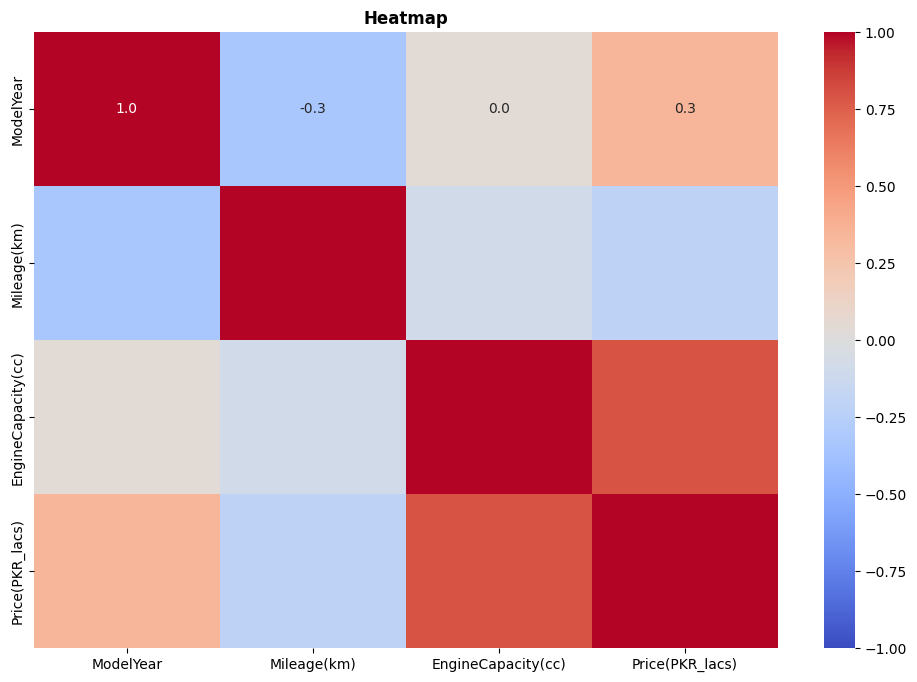

In [10]:
cols_Heatmap = [ 'ModelYear', 'Mileage(km)','EngineCapacity(cc)',  'Price(PKR_lacs)']
plt.figure(figsize = (12,8))
#create palette to show positive values in blue and negative values in red
#cmap=sns.diverging_palette(5, 260, as_cmap=True)
#plot heatmap
sns.heatmap(datafile[cols_Heatmap].corr(), annot=True, fmt='0.1f',cmap="coolwarm", vmin=-1, vmax=1) #fmt='0.1f',cmap="coolwarm")
plt.title('Heatmap', fontweight='bold')

## 5.3 Exploration of relationship between Categorical feature vs Continuous target ( box plot and ANOVA test)

### 5.4.3.1 Visual exploration of relationship between Categorical feature vs Continuous target --- Box plot 

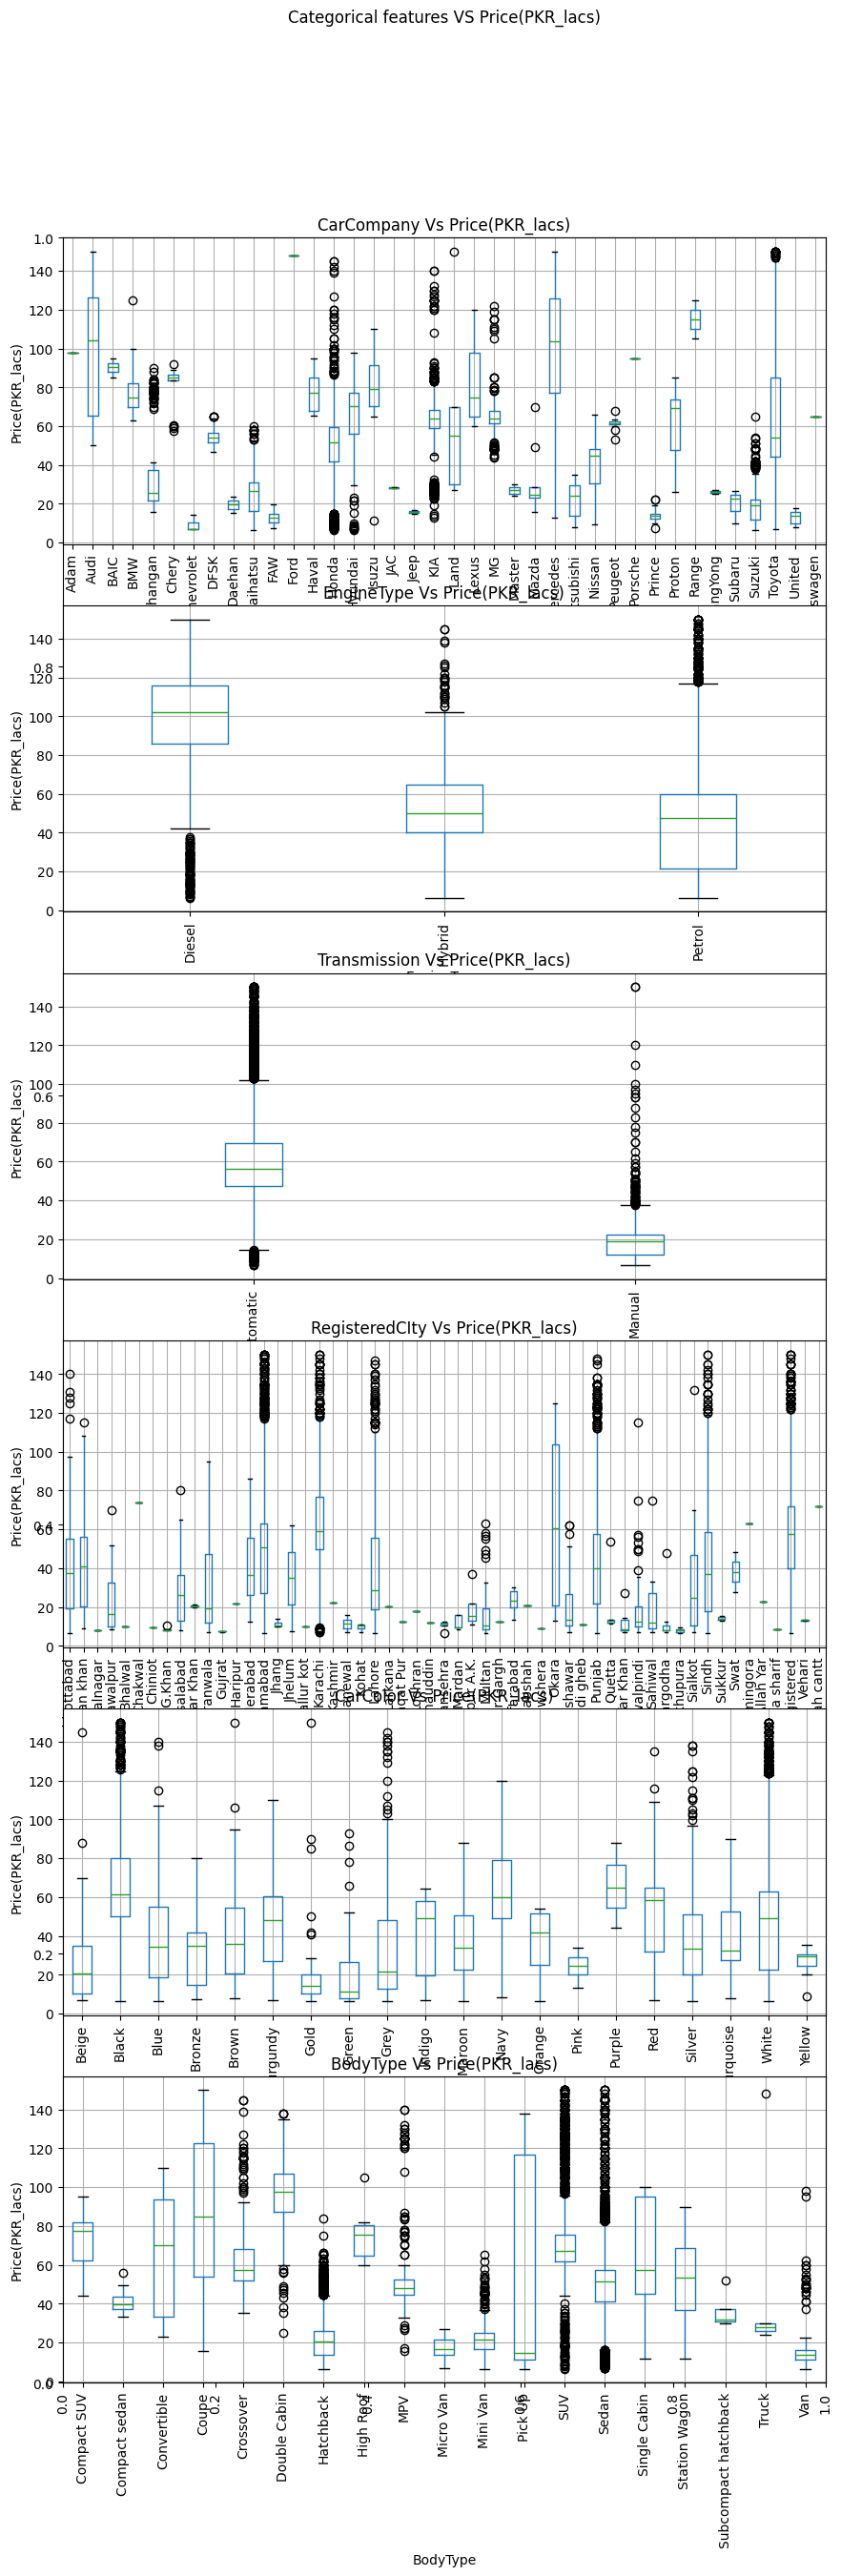

In [11]:
Categorical_features = ['CarCompany','EngineType', 'Transmission', 'RegisteredCIty', 'CarColor', 'BodyType']
fig = plt.figure(figsize=(10, 30))
plt.xticks(rotation=90)
for feature, i in zip (Categorical_features, range(7)):
    ax = plt.subplot(6, 1, i + 1)
    plot = datafile.boxplot(column = 'Price(PKR_lacs)', by = feature, ax=ax)
    plot.set_title(feature + ' Vs ' + 'Price(PKR_lacs)')
    plot.set_xlabel(feature)
    plot.set_ylabel('Price(PKR_lacs)')
    plt.xticks(rotation=90) 

    fig.suptitle("Categorical features VS Price(PKR_lacs)")

The boxplots give an idea about distribution of continuous target in Y-axis for each of the category of feature in the X-axis.

If the distribution is similar for each category i.e. when boxes are in the same line, then it means the categorical feature has NO effect on continuous target.

In the plots the boxes are not in the same line, indicating that these features are correlated with 'Price'.

We will confirm this with the help of ANOVA test

### 5.4.3.2 Statistical measurement of relationship between Categorical feature vs Continuous target --- ANOVA test

H0 --- There is NO relationship between the given feature and target.

H1 --- There is a relationship between the given feature and target.

##### Defining a function for Anova test for all the categorical features

In [12]:
def ANOVA (Data, Categorical_features, Target):
    from scipy.stats import f_oneway
    
    # Creating an empty list of selected features after ANOVA test
    global Selected_features_ANOVA
    Selected_features_ANOVA = []
    
    # For ANOVA test, we need Categorywise_feature_list. 
    # e.g. in case of Age, we need a list of age of people who did not survive and a list of age of people who survied.
    
    print ('------ ANOVA Results ------ \n')
    for feature in Categorical_features:
        Categorywise_feature_list = Data.groupby (feature)[Target].apply(list)
        ANOVA_Results = f_oneway (*Categorywise_feature_list)
        
        # If the p-value of ANOVA test is < 0.05, we will reject null ie.e H0
       
        if  (ANOVA_Results[1] < 0.05) :
            print ('As p-value', ANOVA_Results[1], 'is less than 0.05,    ', feature, 'is correlated with', Target)
            Selected_features_ANOVA.append(feature)
        else:
            print ('As p-value', ANOVA_Results[1], 'is greater than 0.05,    ', feature, 'is NOT correlated with', Target)
    print ('--------------------------------------------------')    
    print ('\nSelected features are :', Selected_features_ANOVA)

##### Calling the function

In [13]:
ANOVA(Data = datafile, Categorical_features = Categorical_features, Target = 'Price(PKR_lacs)')

------ ANOVA Results ------ 

As p-value 0.0 is less than 0.05,     CarCompany is correlated with Price(PKR_lacs)
As p-value 0.0 is less than 0.05,     EngineType is correlated with Price(PKR_lacs)
As p-value 0.0 is less than 0.05,     Transmission is correlated with Price(PKR_lacs)
As p-value 8.284519146507718e-258 is less than 0.05,     RegisteredCIty is correlated with Price(PKR_lacs)
As p-value 4.45346e-319 is less than 0.05,     CarColor is correlated with Price(PKR_lacs)
As p-value 0.0 is less than 0.05,     BodyType is correlated with Price(PKR_lacs)
--------------------------------------------------

Selected features are : ['CarCompany', 'EngineType', 'Transmission', 'RegisteredCIty', 'CarColor', 'BodyType']


As guessed from boxplots, all the categorical features correlated with target 'Price'.

## 5.4 Selecting final columns for Machine Learning

In [14]:
Selected_features = Selected_features_Pearson_Correlation + Selected_features_ANOVA 
Selected_features

['ModelYear',
 'EngineCapacity(cc)',
 'Price(PKR_lacs)',
 'CarCompany',
 'EngineType',
 'Transmission',
 'RegisteredCIty',
 'CarColor',
 'BodyType']